# (3주차) Ch6 행렬 응용 : 데이터 분석에서의 행렬

* 6장의 행렬 응용은 3장의 벡터 응용을 기반으로 구성되어 있음
* 벡터와 행렬을 연결시키는 몇가지 공통적인 내용을 다룸
* 개념과 응용이 복잡해지더라도, 기반은 선형 가중과 내적같은 간단한 원칙에 있음을 잊지말 것.

## Ch6.1 다변량 데이터 공분산 행렬

In [ ]:
# data-Mat이라는 데이터 행렬을 생성하고 공분산 행렬을 계산

# 특징 평균 벡터
datamean = np.mean(dataMat, axis=0)

# 브로드캐스트를 이용한 평균중앙화
dataMatM = dataMat - datamean

# 데이터 행렬의 전치와 데이터 행렬의 곱
covMat = dataMatM.T @ dataMatM

# N-1로 나누기
covMat = covMat / (dataMat.shape[0] - 1)

NumPy 모듈에는 공분산과 상관 행렬을 계산하는 함수가 있음.

*   공분산 : np.cov()
*   상관 행렬 : np.corrcoef()

(더 편리하지만, 공식 그대로 공분산을 먼저 구현해서 메커니즘을 이해하셈)

## Ch6.2 행렬-벡터 곱셈을 통한 기하학적 변환

데이터 동영상을 위한 python 코드

In [ ]:
# step1. 장면 설정
theta = np.linspace(0,2*np.pi,100)
points = np.vstack((np.sin(theta), np.cos(theta)))

fig,ax = plt.subplots(1, figsize=(12,6))
plth, = ax.plot(np.cos(x), np.sin(x), 'ko')

In [ ]:
# step2. 각 프레임마다 축을 업데이트하는 함수를 정의
def aframe(ph):

  # 변환 행렬을 생성하고 적용
  T = np.array([ [1,1-ph], [0,1]])
  P = T@points

  # 접의 위치를 갱신
  plth.set_xdata(P[0,:])
  plth.set_ydata(P[1,:])

  return plth

In [ ]:
# step3. 변환 매개변수를 정의하고 동영상을 생성하는 matplotlib 함수를 호출
phi = np.linspace(-1, 1-1/40, 40)**2
amimation.FuncAnimation(fig, aframe, phi, interval=100, repeat=True)

## Ch6.3 이미지 특징 탐지

In [ ]:
# 2차원 가우스 커널이 생성되는 방법
# 매개변수를 특정값으로 고정

Y, X = np.meshgrid(np.lispace(-3,3,21), np.linspace(-3,3,21))
kernel = np.exp( -(X**2+Y**2)/20)
# 정규화
kernel = kernel / np.sum(kernel)

In [ ]:
# 이미지 합성곱을 python으로 구현한 코드
# for문이 더 필요

# 행에 대한 for 루프
for rowi in range(halfKr, imgN-halfKr):
  # 열에 대한 for 루프
  for coli in range(halfKr, imgN-halfKr):

    # 이미지 조각 자르기
    piece0fImg = imagePad[ rowi-halfKr : rowi+halfKr + 1:1,
                          coli-halfKr : coli+halfKr + 1:1 ]
    # 내적: 아다마르곱과 합
    dotprod = np.sum( piece0fImg*kernel)

    # 이 픽셀에 대한 결과를 저장
    convoutput[rowi, coli] = dotprod

## Ch6.4 정리



> 데이터과학과 머신러닝에서 중요하고 정교한 기법도 실제로는 간단한 선형대수학 원리를 기반으로 만들어졌다.



# Ch6 연습문제

**[연습 문제 6-1]**

공분산 행렬을 상관 행렬로 변환하는 문제.

변환하는 과정에서 각 행렬 원소(변수 쌍 간의 공분산)를 두 변수의 분산들의 곱으로 나누어라.

이것은 공분산 행렬에 각 변수의 역 표준 편차(분산의 제곱근)를 가진 대각 행렬을 앞과 뒤에서 곱해서 구현할 수 있다.

(행렬을 곱하면서 분산으로 나누어야하기 때문에 표준 편차를 반전한 것이며, 대각 행렬을 앞과 뒤에서 곱했을 때의 특성 때문에 표준 편차를 앞과 뒤에서 곱한다.)

> 공분산으로부터 상관관계를 계산하는 공식 : R = SCS

(C는 공분산 행렬, S는 변수의 역 표준 편차의 대각 행렬)

해당 식을 pyhon 코드로 변환하여, 공분산 행렬로부터 상관 행렬을 계산하여라.

In [ ]:
import numpy as np

# 공분산 행렬로부터 상관 행렬을 계산하는 함수
def covariance_to_correlation(cov_matrix):
    # 공분산 행렬의 대각 원소(분산)로부터 표준 편차 계산
    std_devs = np.sqrt(np.diag(cov_matrix))

    # 역 표준 편차로 구성된 대각 행렬 S 생성
    inv_std_devs = np.diag(1 / std_devs)

    # 상관 행렬 계산: R = SCS
    correlation_matrix = inv_std_devs @ cov_matrix @ inv_std_devs

    return correlation_matrix

In [ ]:
# 예시 공분산 행렬
cov_matrix = np.array([[4, 2, 0.6],
                       [2, 3, 0.9],
                       [0.6, 0.9, 5]])

# 상관 행렬 계산
corr_matrix = covariance_to_correlation(cov_matrix)

# 결과 출력
print("공분산 행렬:\n", cov_matrix)
print("\n상관 행렬:\n", corr_matrix)

공분산 행렬:
 [[4.  2.  0.6]
 [2.  3.  0.9]
 [0.6 0.9 5. ]]

상관 행렬:
 [[1.         0.57735027 0.13416408]
 [0.57735027 1.         0.232379  ]
 [0.13416408 0.232379   1.        ]]


**[연습 문제 6-2]**

데이터 행렬을 입력으로 받아 상관 행렬을 반환하는 np.corrcoef() 함수를 이용하는 문제이다.

이 함수를 이용하여 행렬과 행렬 간의 차이를 나타내어 행렬이 동일한지 확인해 보아라.

다음으로 ?np.corrcoef()를 통해 np.corrcoef()의 소스 코드를 파악하여라.

NumPy는 역 표준 편차의 대각 행렬을 앞과 뒤에서 곱하지 않고 브로드캐스트를 사용해 표준 편차로 나누는 방식으로 구현되어 있다.

이 코드 구현이 이전 문제에서 작성한 수학과 python 코드와 어떻게 같은지 이해해야한다.

In [ ]:
import numpy as np

# 공분산 행렬을 상관 행렬로 변환하는 함수 (이전 문제의 코드)
# def covariance_to_correlation(cov_matrix):

# 데이터 행렬로부터 공분산 행렬 계산 후 상관 행렬 반환
def data_to_correlation(data_matrix):
    # 데이터 행렬의 공분산 행렬
    cov_matrix = np.cov(data_matrix, rowvar=False)
    return covariance_to_correlation(cov_matrix)

# 임의의 데이터 행렬 생성
data_matrix = np.random.randn(5, 4)

In [ ]:
# np.corrcoef()을 이용한 상관 행렬 계산
corr_matrix_np = np.corrcoef(data_matrix, rowvar=False)

# 직접 구현한 공분산-상관 행렬 변환을 이용한 상관 행렬 계산
corr_matrix_custom = data_to_correlation(data_matrix)

# 두 행렬의 차이 계산
difference = corr_matrix_np - corr_matrix_custom

In [ ]:
# 결과 출력
print("np.corrcoef()로 계산한 상관 행렬:\n", corr_matrix_np)
print("\n직접 구현한 상관 행렬:\n", corr_matrix_custom)
print("\n두 행렬의 차이:\n", difference)

np.corrcoef()로 계산한 상관 행렬:
 [[ 1.          0.43014528  0.41509879  0.17226628]
 [ 0.43014528  1.          0.32907943 -0.36275577]
 [ 0.41509879  0.32907943  1.          0.51705359]
 [ 0.17226628 -0.36275577  0.51705359  1.        ]]

직접 구현한 상관 행렬:
 [[ 1.          0.43014528  0.41509879  0.17226628]
 [ 0.43014528  1.          0.32907943 -0.36275577]
 [ 0.41509879  0.32907943  1.          0.51705359]
 [ 0.17226628 -0.36275577  0.51705359  1.        ]]

두 행렬의 차이:
 [[-2.22044605e-16 -5.55111512e-17 -5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.55111512e-17  0.00000000e+00  1.11022302e-16]
 [ 2.77555756e-17 -5.55111512e-17 -1.11022302e-16  2.22044605e-16]]


In [ ]:
# 두 행렬이 동일한지 확인 (허용 오차 내에서)
print("두 행렬이 동일한가? ", np.allclose(corr_matrix_np, corr_matrix_custom))

두 행렬이 동일한가?  True


**[연습 문제 6-3]**

기하하적 변환 연습 문제

회전 전과 후의 선을 보여 준 것처럼 변환을 적용하기 전과 후의 원안의 점을 나타내는 것이다.

다음 변환 행렬을 사용해서 [그림 6-8]과 같은 그래프를 만들어라.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 변환 행렬 T 정의
T = np.array([[1, 0.5], [0, 0.5]])

In [ ]:
# 원 위의 점들 생성
theta = np.linspace(0, 2 * np.pi, 100)  # 0부터 2π까지 100개의 점 생성
x = np.cos(theta)  # 원의 x좌표
y = np.sin(theta)  # 원의 y좌표

# 원 위의 점을 (x, y) 형식으로 저장
points = np.vstack((x, y))

# 변환 행렬 T를 적용한 점들 계산
transformed_points = T @ points

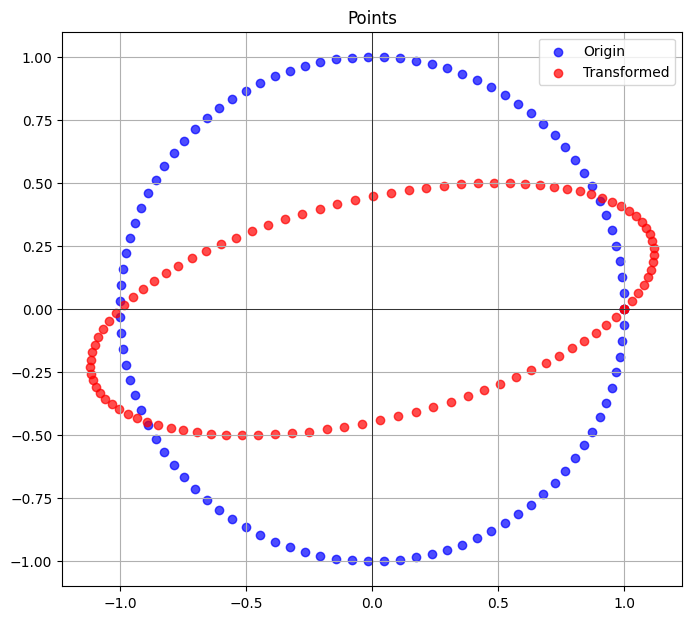

In [ ]:
# 변환 후의 x와 y 좌표 분리
x_transformed = transformed_points[0, :]
y_transformed = transformed_points[1, :]

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(x, y, label='Origin', color='blue', alpha=0.7)  # 변환 전의 원의 점들
plt.scatter(x_transformed, y_transformed, label='Transformed', color='red', alpha=0.7)  # 변환 후의 점들
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Points')
plt.gca().set_aspect('equal')  # 축을 동일한 비율로 설정
plt.grid(True)
plt.show()